In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class PolinomioInterpolador:
    def __init__(self,x:list[float],y:list[float]):
        """Inicializa o polinômio interpolador de um dado conjuto de pontos.

        Args:
            x: Coordenadas x dos pontos de interpolação. Pode ser uma lista ou array numpy.
            y: Coordenadas y dos pontos de interpolação. Pode ser uma lista ou array numpy.
        
        """
        self.x=np.array(x)
        self.y=np.array(y)

    def coeficientes(self) -> list[float]:
        """Calcula e retorna os coeficientes do polinômio interpolador de grau n-1.

        O método calcula os coeficientes do polinômio interpolador que passa pelos
        pontos (x,y) por meio da construção da matriz de Vandermonde V e resolvendo o
        sistema linear V.X=y.
        O polinômio resultante é P(t) = X[0] + X[1]*t + ... + X[n-1]*t^(n-1).

        Returns:
            np.array: Coeficientes do polinômio do grau 0 ao grau n-1.

        Raises:
            numpy.linalg.LinAlgError: Se a matriz de Vandermonde for singular
            ValueError: Se as listas x e y tiverem tamanhos diferentes.
        """
        matrizV = np.vander(self.x, increasing=True)
        X = np.linalg.solve(matrizV, self.y)
        return X

    def __str__(self) -> str:
        """Representa o polinômio interpolador em formato de string.

        Returns:
            str: Representação no formato a_0+a_1*x^1+...+a_n*x^n
        """
        X = self.coeficientes()
        if len(X)==0:
            return "0"
        polinomio = f"{X[0]:.10g}"
        for i in range(1,len(X)):
            polinomio="".join([polinomio,f"+{X[i]:.10g}*x^{i}"])
        return polinomio.replace("+-","+")
    
    def _lagrange(self,x:float|int|np.float64|np.float32|np.int64|np.int32):
        """Avalia o polinômio interpolador para o valor x pelo método de Lagrange.

        O método calcula o valor de y no ponto (x,y) no polinômio interpolador de
        Lagrange.
        
        Args:
            x: Valor a ser interpolado.

        Returns:
            float: Resultado de x no polinômio interpolador.

        Raises:
            ValueError: Se x não é do tipo numérico.
        """
        P=0
        for i in range(len(self.x)):
            p = 1
            for j in range(len(self.x)):
                if i!=j:
                    p*=(x-self.x[j])/(self.x[i]-self.x[j])
            P+=p*self.y[i]
        return P
    
    def __call__(self, x):
        """Permite que o polinômio atue como uma função matemática com entrada x.
        
        Args:
            x: Valor(es) a ser(em) interpolado(s).

        Returns:
            Resultado de x no polinômio interpolador.

        Raises:
            ValueError: Se x não é do tipo numérico.
        """
        if isinstance(x,(float, int, np.float64, np.float32, np.int64, np.int32)):
            return self._lagrange(x)
        elif isinstance(x,(list,np.ndarray)):
            resultados = []
            for i in x:
                resultados.append(self._lagrange(i))
            return resultados
        raise ValueError
    
    '''def add(self,x,y):
        """Atualiza o polinômio interpolador com a adição de pontos"""

    def remove(self,x):
        """Atualiza o polinômio interpolador com a remoção de pontos"""'''

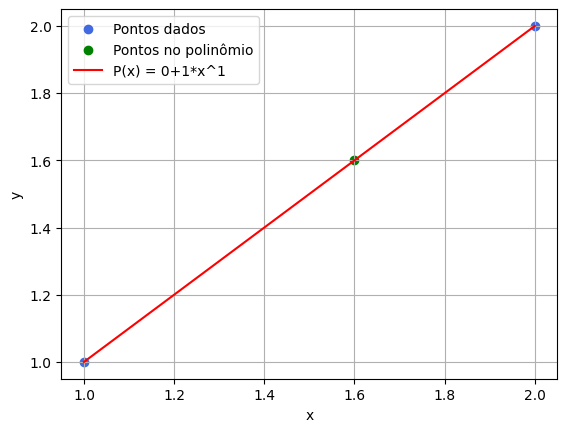

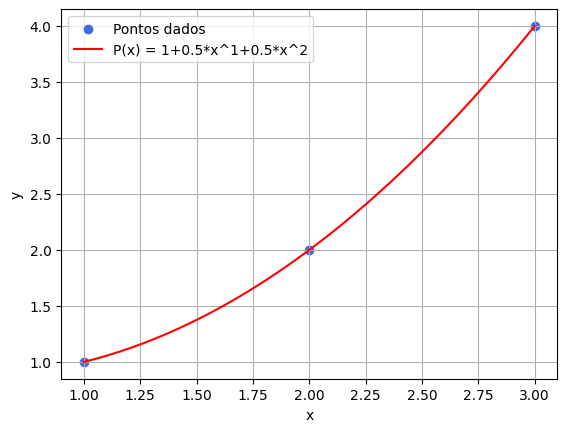

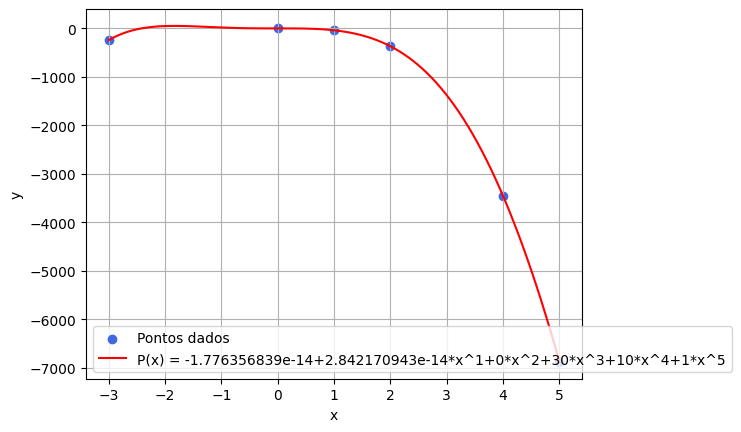

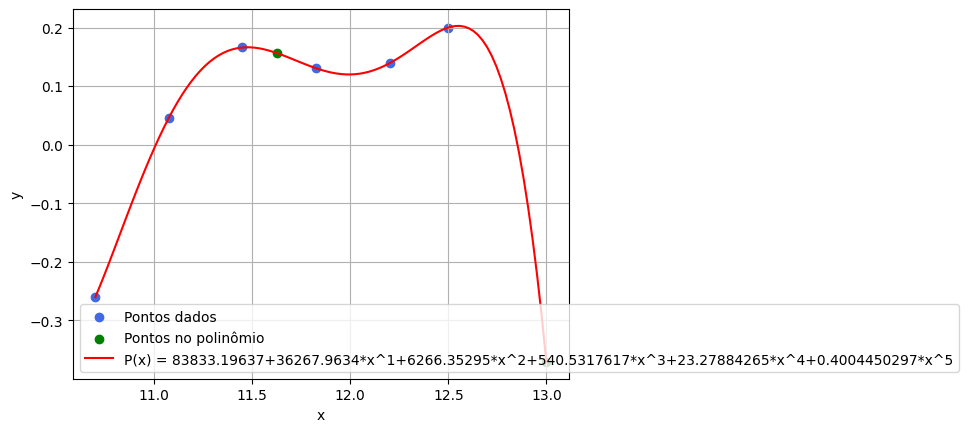

In [5]:
def plot_polinomioInterpolador(x, y, p=None):
    """Plota polinômio interpolador e pontos dados.

        O método plota o polinômio interpolador calculado pela classe PolinomioInterpolador
        e os pontos dos dados originais e, opcionalmente, novos pontos calculados pelo
        polinômio.
        
        Args:
            x: Coordenadas x dos pontos de interpolação. Pode ser uma lista ou array numpy.
            y: Coordenadas y dos pontos de interpolação. Pode ser uma lista ou array numpy.
            p: Coordenadas x dos novos pontos a serem plotados pelo polinômio interpolador.
    """
    polinomio = PolinomioInterpolador(x, y)

    plt.scatter(x, y, color='royalblue', label='Pontos dados')
    Min = min(x)
    Max = max(x)
    if p:
        plt.scatter(p, polinomio(p), color='green', label='Pontos no polinômio')
        if isinstance(p,(list,np.ndarray)):
            if min(p)<Min:
                Min=min(p)
            if max(p)>Max:
                Max=max(p)
        else:
            if p<Min:
                Min=p
            if p>Max:
                Max=p
    num_pts = 100
    X = np.linspace(Min, Max, num_pts)
    coeficientes = polinomio.coeficientes()[::-1]
    Y = np.polyval(coeficientes, X)
    plt.plot(X, Y, '-r', label=f'P(x) = {polinomio}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplos:
X1 = [1,2]
Y1 = [1,2]
plot_polinomioInterpolador(X1, Y1, 1.6)

X2 = [1,2,3]
Y2 = [1,2,4]
plot_polinomioInterpolador(X2, Y2)

X3 = [1,2,-3,4,5,0]
Y3 = [-39,-368,-243,-3456,-6875,0]
plot_polinomioInterpolador(X3, Y3)

DataX = [10.7, 11.075, 11.45, 11.825, 12.2, 12.5]
DataY = [-0.25991903,  0.04625002,  0.16592075,  0.13048074,  0.13902777, 0.2]
plot_polinomioInterpolador(DataX, DataY,[11.625, 13])